__Ансамбли - это методы, сочетающие в себе несколько алгоритмов машинного обучения для получения более мощной модели.__

В случае задачи регрессии при использовании композиции $a(x)$ из $N$ _базовых алгоритмов_ $b_{n}(x)$ ответом будет считаться среднее значение ответа каждого алгоритма

$$a(x) = \frac{1}{N}\sum_{n=1}^{N}b_{n}(x),$$

в задачах классификации, соответственно, знак полученного усредненного ответа или (что аналогично) класс определяется путем *голосования*: объект относится к классу, за который "проголосовало" наибольшее число базовых алгоритмов.

Одни из самых хорошо зарекомендовавших себя на практике решения задач классификации и регрессии с использованием деревьев решения - это _случайные леса_ и _градиентный бустинг_. В этом уроке пойдет речь о первом методе.

__Разложения ошибки на смещение и разброс.__

Известно, что ошибка алгоритмов складывается из _смещения (bias)_ (отклонение среднего ответа обученного алгоритма от ответа идеального алгоритма) и _разброса_ или _дисперсии (variance)_ (разброс ответов обученных алгоритмов отнисительно среднего ответа). Также к этому разложению обычно прибавляется *шум*, который характеризует ошибку идеального алгоритма и которым никак нельзя управлять - это характеристика входных данных. Как правило, простые семейства алгоритмов (например, линейные классификаторы) характеризуются высоким смещением и низким разбросом, а сложные семейства (в т.ч. деревья) наоборот - низким смещением и высоким разбросом. Можно сказать, что разброс характеризует чувствительность метода обучения к выборке, то есть насколько будет изменяться ответ обученного алгоритма в зависимости от изменений в обучающей выборке.


<center>Ошибка на новых данных = Шум + Смещение + Разброс, где</center>

ШУМ - ошибка лучшей модели a(x)

СМЕЩЕНИЕ - отклонение усредненных ответов наших моделей от ответов лучшей модели a(x)

РАЗБРОС - дисперсия ответов наших моделей

**Бутстрап**

Случайные леса названы так из-за того, что в процесс построения деревьев, из которых они состоят, внесен элемент случайности для обеспечения уникальности каждого из деревьев. Такая рандомизация заключается в обучении базовых алгоритмов на разных подвыборках обучающей выборки. Один из способов построения случайных подвыборок - _бутстрап (bootstrap)_. Этот метод заключается в получении из выборки длины $l$ нескольких разных выборок той же длины $l$. Для получения бутстрап-выборки из исходной выборки $l$ раз выбирается случайный элемент, причем каждый раз новый элемент выбирается из всей выборки. Таким образом, в полученной в конечном итоге бутстрап-выборке некоторые элементы исходной выборки будут встречаться несколько раз, а некоторые (примерно 37% выборки) будут вовсе отсутствовать, и при повторении $N$ раз мы получим $N$ разных выборок длиной $l$. Например, если у нас есть исходная выборка вида [a, b, c, d, e], возможными бутстрап-выборками могут быть [a, b, a, c, b] или [b, e, e, d, b] и т.д.

__Алгоритм построения случайного леса__

При построении случайного леса вначале генерируется количество бутстрап-выборок, равное количеству деревьев в алгоритме. Для уменьшения корреляции базовых алгоритмов рандомизируют сам процесс построения каждого дерева: если в стандартном методе построения деревьев мы в каждом узле выбираем $j$-й признак и порог $t$, с которым сравнивается его значение, и потом эти значения оптимизируются с помощью функции ошибки, то в методе случайного леса в каждой вершине $j$-й признак выбирается не из всего пространства признаков, а из его случайного подмножества размера $m$, __которое каждый раз выбирается заново__ (в этом отличие от метода случайных подпространств, где подпространство выбирается единожды и используется для построения всего дерева). 

Есть некоторые практически рекомендации по построению случайных лесов: в задачах классификации рекомендуется брать $m = \sqrt{d}$, где $d$ - общее число признаков, и строить дерево до тех пор, пока в каждом листе не останется по одному объекту, а в задаче регрессии принимать $m = d/3$ и строить дерево, пока в листьях не останется по пять объектов.

Далее построенные деревья объединяются в композицию, и при предсказаниях с его помощью используется усредненный ответ на каждом дереве.

__Out-of-Bag__

Вспомним, что каждое дерево $b_{n}$, составляющее случайный лес, строится на основе бутстрапированной выборки $X_{n}$. При этом примерно 37% объектов не попадают в эту выборку, и дерево на них не обучается. Эти объекты можно использовать для оценки качества полученного алгоритма, это и называется _out-of-bag error_. Для каждого объекта $x_{i}$ мы можем найти деревья, которые на нем не обучались, и вычислить ошибку: она рассчитывается как сумма значений ошибки для среднего ответа на каждом объекте $x_{i}$ среди деревьев, которые на нем не обучались:

$$OOB = \sum^{l}_{i=1}L\left ( y_{i}, \:\frac{1}{\sum^{N}_{n=1}[x_{i}\notin X_{n}]} \sum^{N}_{n=1}[x_{i} \notin X_{n}]b_{n}(x_{i}) \right ).$$

Здесь $L(y, z)$ - функция потерь, а выражение в скобках и представляет из себя среднюю ошибку на объекте $x_{i}$ среди деревьев, которые на нем не обучались.

10 obj, 5 trees

TRAIN:
1 tree: 0, 1, 2, 3, 4, 5, 6, 4, 4, 4 - not train: 7, 8, 9
2 tree: 0, 6, 4, 3, 4, 4, 1, 2, 3, 3 - not train: 7, 8, 9, 5
3 tree:                              - not train: 1, 2, 3
4 tree:                              - not train: 2, 3, 4
5 tree:                              - not train: 4, 5, 6
    
    
TEST:
0 - 
1 - 3 tree -> 0               | 0  | true 0
2 - 3 tree -> 1, 4 tree -> 1  | 1  | true 0
3 - 3 tree -> 0, 4 tree -> 1  | 1  | true 1
4 - 4 tree -> 1, 5 tree -> 1  | 1  | true 1
5 - 2 tree -> 0, 5 tree -> 0  | 0  | true 0
6 - 5 tree -> 1
7 - 
8 -
9 -

При использовании этого метода оценивания качества исчезает необходимость использовать отложенные выборки и кросс-валидацию при обучении случайных лесов.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import functools
import math
import seaborn as sns
from matplotlib.colors import ListedColormap


class Node:
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле


# И класс терминального узла (листа)
class Leaf:
    def __init__(self, data, labels, classes_or_values=True):
        self.data = data
        self.labels = labels
        if classes_or_values:
            self.prediction = self.__predict_classes()
        else:
            self.prediction = self.__predict_values()

    def __predict_classes(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        # найдем класс, количество объектов которого будет максимальным в этом листе и вернем его
        prediction = max(classes, key=classes.get)
        return prediction

    def __predict_values(self):
        return self.labels.mean()


class ForestTree:
    def __init__(self, X, Y, N=3, classes_or_values=True, len_sample=None, min_samples_leaf=1, max_tree_depth=None):
        self.X = X
        self.Y = Y
        self.N = N
        self.classes_or_values = classes_or_values

        if len_sample == None and classes_or_values:
            self.len_sample = int(math.sqrt(self.X.shape[1]))
            if self.len_sample == 0:
                self.len_sample = 1
        elif len_sample == None:
            self.len_sample = self.X.shape[1] // 3
            if self.len_sample == 0:
                self.len_sample = 1
        elif N < len_sample:
            self.len_sample = self.X.shape[1]
        else:
            self.len_sample = len_sample

        # print(self.len_sample)
        # Ограничение минимального количества n объектов в листе.
        self.min_samples_leaf = min_samples_leaf
        # Ограничение максимальной глубины дерева.
        self.max_tree_depth = max_tree_depth
        # Корень дерева решений
        self.forest = None
        self.oob_error = None
        self.cm = None

    def set_standard_scale(self):
        """
        Стандартизация столбца данных
        :param index: self.data[:, index]
        :return: None -> меняет значения по адресам слолбца в self.data
        """
        means = np.mean(self.X, axis=0)
        stds = np.std(self.X, axis=0)
        for i in range(self.X.shape[0]):
            for j in range(self.X.shape[1]):
                self.X[i][j] = (self.X[i][j] - means[j]) / stds[j]

    @functools.lru_cache()
    def test_train(self, train_proportion: float = 0.7):
        """
        Перемешивает -> Разделяет на тестовую и тренеровочную выборку
        :param train_proportion: интервалы разбитья от 0 до 1
        :return: self.X_train, self.X_test, self.Y_train, self.Y_test
        """
        np.random.seed(12)
        shuffle_index = np.random.permutation(self.X.shape[0])
        X_shuffled, y_shuffled = self.X[shuffle_index, :], self.Y[shuffle_index]
        # X_shuffled, y_shuffled = self.data, self.y
        train_test_cut = int(self.X.shape[0] * train_proportion)

        self.X_train, self.X_test, self.Y_train, self.Y_test = \
            X_shuffled[:train_test_cut], \
                X_shuffled[train_test_cut:], \
                y_shuffled[:train_test_cut], \
                y_shuffled[train_test_cut:]

        return self.X_train, self.X_test, self.Y_train, self.Y_test

    # Расчет критерия Джини
    def __gini(self, labels):
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  расчет критерия
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2
        return impurity

    # Расчет прироста
    def __gain(self, left_labels, right_labels, root_gini):
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        return root_gini - p * self.__gini(left_labels) - (1 - p) * self.__gini(right_labels)

    def __split(self, data, labels, column_index, t):

        left = np.where(data[:, column_index] <= t)
        right = np.where(data[:, column_index] > t)

        true_data = data[left]
        false_data = data[right]

        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels

    def __get_bootstrap(self, data, labels, N):
        np.random.seed(42)
        n_samples = data.shape[0]  # размер совпадает с исходной выборкой
        bootstrap = []

        for i in range(N):
            sample_index = np.random.randint(0, n_samples, size=n_samples)
            temp = set(sample_index.tolist())
            oob_indexs = []
            for j in range(n_samples):
                flag = True
                for l in temp:
                    if l == j:
                        flag = False
                        break
                if flag:
                    oob_indexs.append(j)
            b_data = data[sample_index]
            b_labels = labels[sample_index]

            bootstrap.append((b_data, b_labels, oob_indexs))

        return bootstrap

    def __get_subsample(self, len_sample):
        # будем сохранять не сами признаки, а их индексы
        sample_indexes = list(range(len_sample))

        len_subsample = int(np.round(np.sqrt(len_sample)))

        subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

        return subsample

    def __find_best_split(self, data, labels):

        root_gini = self.__gini(labels)
        best_gain = 0
        best_t = None
        best_index = None

        feature_subsample_indices = self.__get_subsample(self.len_sample)  # выбираем случайные признаки

        for index in feature_subsample_indices:
            t_values = np.unique(data[:, index])
            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.__split(data, labels, index, t)
                if len(true_data) < self.min_samples_leaf or len(false_data) < self.min_samples_leaf:
                    continue

                current_gain = self.__gain(true_labels, false_labels, root_gini)
                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index

    def __build_tree(self, data, labels, classes_or_values, count_tree_depth=0):
        if self.max_tree_depth and count_tree_depth > self.max_tree_depth:
            return Leaf(data, labels, classes_or_values)
        count_tree_depth += 1

        gain, t, index = self.__find_best_split(data, labels)

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if gain == 0:
            return Leaf(data, labels, classes_or_values)

        true_data, false_data, true_labels, false_labels = self.__split(data, labels, index, t)

        true_branch = self.__build_tree(true_data, true_labels, classes_or_values, count_tree_depth)
        false_branch = self.__build_tree(false_data, false_labels, classes_or_values, count_tree_depth)

        return Node(index, t, true_branch, false_branch)

    def fit(self, data=None, labels=None, n_trees=None, len_sample=None, classes_or_values=None, metric_name='mse'):
        if data == None:
            data = self.X
        else:
            self.X = data

        if labels == None:
            labels = self.Y
        else:
            self.y = labels

        if n_trees == None:
            n_trees = self.N
        else:
            self.N = n_trees

        if classes_or_values != None:
            self.classes_or_values = classes_or_values


        if len_sample != None and self.X.shape[1] < len_sample:
            self.len_sample = self.X.shape[1]
        elif len_sample != None:
            self.len_sample = len_sample

        forest = []

        bootstrap = self.__get_bootstrap(data, labels, n_trees)

        oob_indexs = []

        for b_data, b_labels, oob_index in bootstrap:
            tree = self.__build_tree(b_data, b_labels, self.classes_or_values)
            forest.append(tree)
            oob_indexs.append(oob_index)

        correct = 0
        nn = 0
        predicted = []
        actual = []
        for i in range(data.shape[0]):
            temp = []
            for j, indexs in enumerate(oob_indexs):
                for index in indexs:
                    if i == index:
                        temp.append(self.__predict(np.array([data[index, :]]), forest[j])[0])
                        break
            if len(temp) != 0:
                if self.classes_or_values:
                    y_pred = max(set(temp), key=temp.count)
                    if y_pred == labels[i]:
                        correct += 1
                    nn += 1
                else:
                    predicted.append(np.mean(temp))
                    actual.append(labels[i])

        if self.classes_or_values:
            oob_value = correct / nn * 100
        else:
            if metric_name == 'mse':
                oob_value = self.__mse(np.array(actual), np.array(predicted))
            else:
                oob_value = self.__mae(np.array(actual), np.array(predicted))
        self.forest = forest
        self.oob_error = oob_value
        return forest, oob_value

    def __predict_object(self, obj, node):
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.__predict_object(obj, node.true_branch)
        else:
            return self.__predict_object(obj, node.false_branch)

    def __predict(self, data, tree):
        preds = []
        for obj in data:
            prediction = self.__predict_object(obj, tree)
            preds.append(prediction)
        return preds

    def predict(self, data):
        # добавим предсказания всех деревьев в список
        predictions = []
        for tree in self.forest:
            predictions.append(self.__predict(data, tree))
            # print(predictions)

        # сформируем список с предсказаниями для каждого объекта
        predictions_per_object = list(zip(*predictions))
        # print(predictions_per_object)

        # выберем в качестве итогового предсказания для каждого объекта то,
        # за которое проголосовало большинство деревьев
        voted_predictions = []
        for obj in predictions_per_object:
            if self.classes_or_values:
                voted_predictions.append(max(set(obj), key=obj.count))
            else:
                voted_predictions.append(np.mean(np.array(obj)))
        return voted_predictions

    def __mse(self, actual, predicted):
        return (np.sum((actual - predicted) ** 2)) / len(actual)

    def __mae(self, actual, predicted):
        return np.mean(np.abs(actual - predicted))

    def __get_meshgrid(self, data, step=.05, border=1.2):
        x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
        y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
        return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    def visualize(self, train_data, train_labels, test_data, test_labels):
        plt.figure(figsize=(16, 7))

        colors = ListedColormap(['red', 'blue'])
        light_colors = ListedColormap(['lightcoral', 'lightblue'])
        
        # график обучающей выборки
        plt.subplot(1, 2, 1)
        xx, yy = self.__get_meshgrid(train_data)
        mesh_predictions = np.array(self.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
        plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
        plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap=colors)

        train_accuracy = self.__accuracy_metric_classify(train_labels, self.predict(train_data))
        plt.title(f'Train accuracy={train_accuracy:.2f}')

        # график тестовой выборки
        plt.subplot(1, 2, 2)
        plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
        plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap=colors)

        test_accuracy = self.__accuracy_metric_classify(test_labels, self.predict(test_data))
        plt.title(f'Test accuracy={test_accuracy:.2f}')
        plt.show()

    def __accuracy_metric_classify(self, actual, predicted):
        correct = 0
        for i in range(actual.shape[0]):
            if actual[i] == predicted[i]:
                correct += 1
        return correct / float(len(actual)) * 100.0

In [2]:
from sklearn.datasets import make_classification

    # data, labels = make_classification(n_samples=1000, n_features=2, n_informative=2,
    #                                    n_classes=2, n_redundant=0,
    #                                    n_clusters_per_class=1, random_state=3)
data, labels = make_classification(n_samples=1000, n_features=2, n_informative=2,
                                   n_classes=2, n_redundant=0,
                                   n_clusters_per_class=1, random_state=23)

N = 5
len_sample = 2
min_samples_leaf = 5

max_tree_depth = None

foresttree = ForestTree(X=data, Y=labels, N=N, classes_or_values=True, len_sample=len_sample,
                        min_samples_leaf=min_samples_leaf, max_tree_depth=max_tree_depth)

# print(foresttree.test_list)
print(foresttree.fit()[1])

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True, n_estimators=5)
rf.fit(data, labels)

rf.oob_score_


89.0728476821192


C:\Users\isip8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\isip8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


0.86

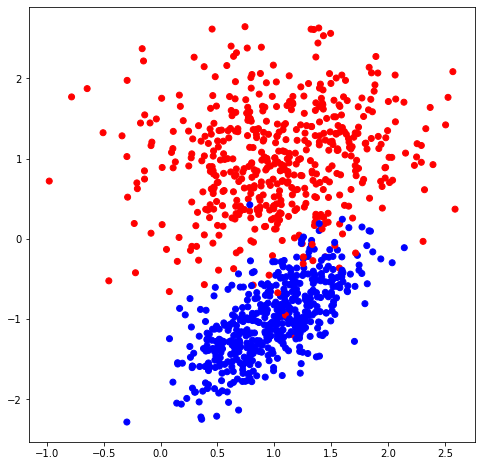

In [3]:
data, labels = make_classification(n_samples=1000,
                                 n_features=2, n_informative=2, 
                                 n_classes=2, n_redundant=0, 
                                 n_clusters_per_class=1, random_state=3)

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], 
              c=labels, cmap=colors);

In [4]:
N = 5
len_sample = 2
min_samples_leaf = 5

max_tree_depth = None

foresttree = ForestTree(X=data, Y=labels, N=N, classes_or_values=True, len_sample=len_sample,
                        min_samples_leaf=min_samples_leaf, max_tree_depth=max_tree_depth)

X_train, X_test, Y_train, Y_test = foresttree.test_train()

C:\Users\isip8\AppData\Local\Temp/ipykernel_4484/3859836893.py:340: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
C:\Users\isip8\AppData\Local\Temp/ipykernel_4484/3859836893.py:348: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


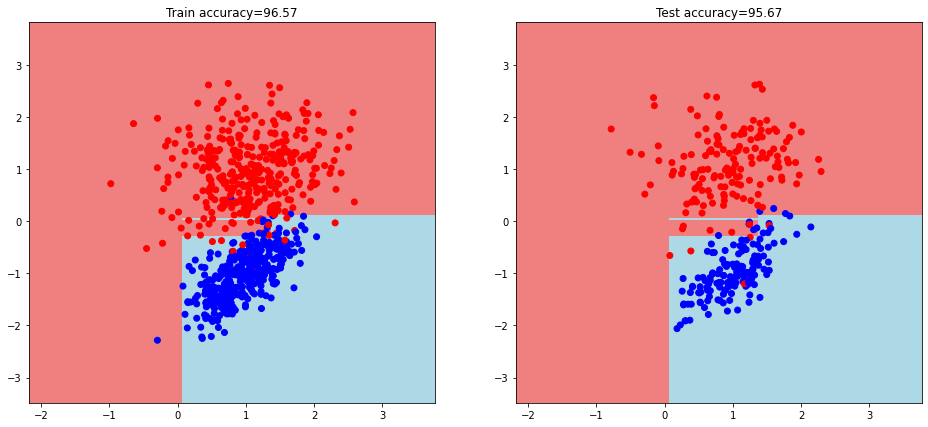

Wall time: 443 ms


In [5]:
%%time
N = 1
foresttree = ForestTree(X=X_train, Y=Y_train, N=N, classes_or_values=True, len_sample=len_sample,
                        min_samples_leaf=min_samples_leaf, max_tree_depth=max_tree_depth)
foresttree.fit()
foresttree.visualize(X_train, Y_train, X_test, Y_test)

C:\Users\isip8\AppData\Local\Temp/ipykernel_4484/3859836893.py:340: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
C:\Users\isip8\AppData\Local\Temp/ipykernel_4484/3859836893.py:348: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


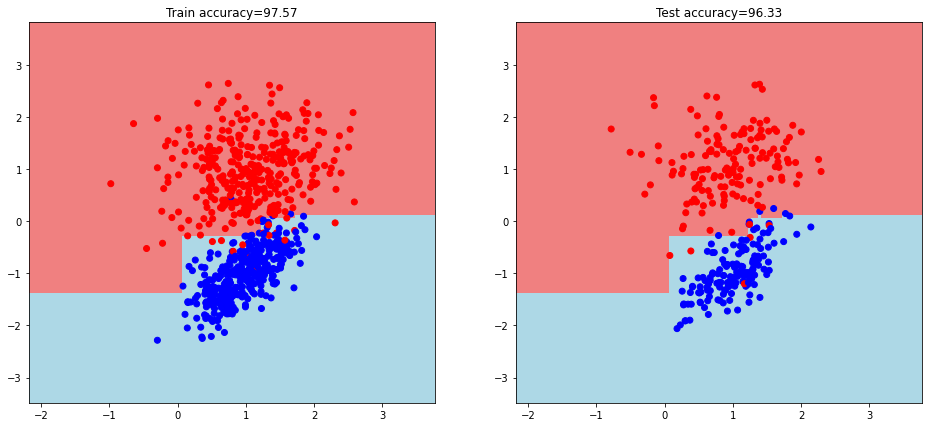

Wall time: 833 ms


In [6]:
%%time
N = 3
foresttree = ForestTree(X=X_train, Y=Y_train, N=N, classes_or_values=True, len_sample=len_sample,
                        min_samples_leaf=min_samples_leaf, max_tree_depth=max_tree_depth)
foresttree.fit()
foresttree.visualize(X_train, Y_train, X_test, Y_test)

C:\Users\isip8\AppData\Local\Temp/ipykernel_4484/3859836893.py:340: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
C:\Users\isip8\AppData\Local\Temp/ipykernel_4484/3859836893.py:348: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


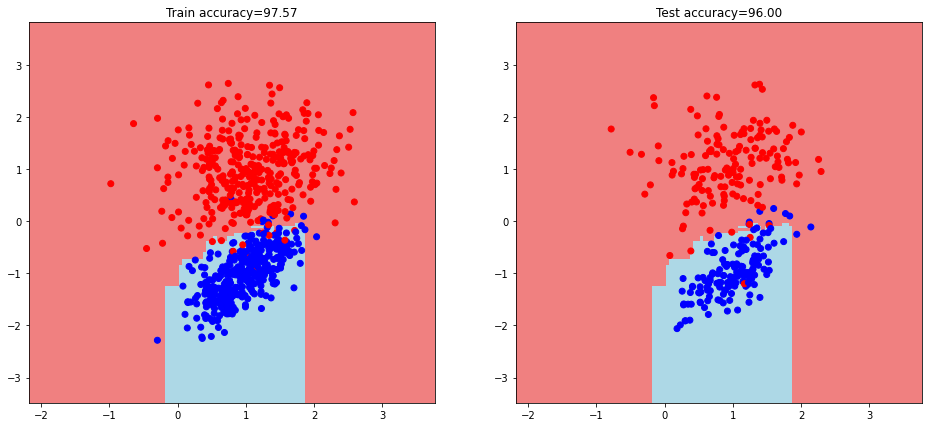

Wall time: 2.7 s


In [7]:
%%time
N = 10
foresttree = ForestTree(X=X_train, Y=Y_train, N=N, classes_or_values=True, len_sample=len_sample,
                        min_samples_leaf=min_samples_leaf, max_tree_depth=max_tree_depth)
foresttree.fit()
foresttree.visualize(X_train, Y_train, X_test, Y_test)

C:\Users\isip8\AppData\Local\Temp/ipykernel_4484/3859836893.py:340: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
C:\Users\isip8\AppData\Local\Temp/ipykernel_4484/3859836893.py:348: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


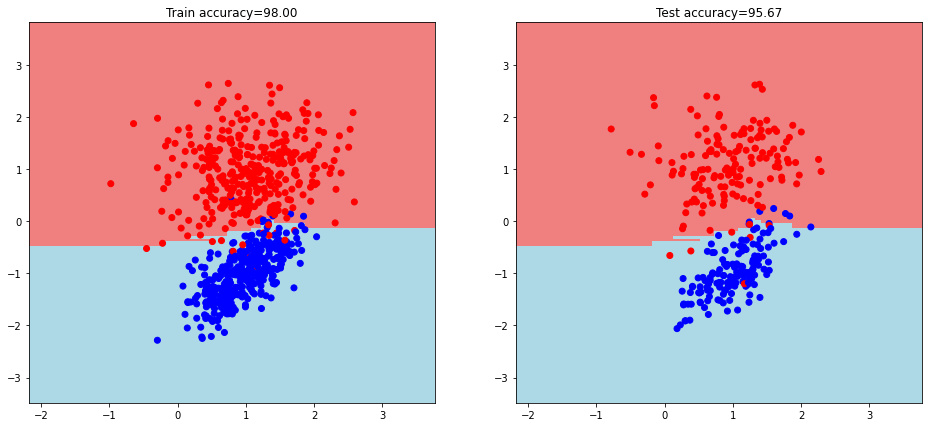

Wall time: 12.4 s


In [8]:
%%time
N = 50
foresttree = ForestTree(X=X_train, Y=Y_train, N=N, classes_or_values=True, len_sample=len_sample,
                        min_samples_leaf=min_samples_leaf, max_tree_depth=max_tree_depth)
foresttree.fit()
foresttree.visualize(X_train, Y_train, X_test, Y_test)

In [9]:
from tqdm import tqdm
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

train_accs = []
test_accs = []
oob_score_list = []

for i in tqdm(range(1, 51)):
    foresttree = ForestTree(X=X_train, Y=Y_train, N=i, classes_or_values=True, len_sample=len_sample,
                        min_samples_leaf=min_samples_leaf, max_tree_depth=max_tree_depth)
    forest, oob_score = foresttree.fit()
    
    oob_score_list.append(oob_score)
    train_accs.append(accuracy_metric(Y_train, foresttree.predict(X_train)))
    test_accs.append(accuracy_metric(Y_test, foresttree.predict(X_test)))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:37<00:00,  5.55s/it]


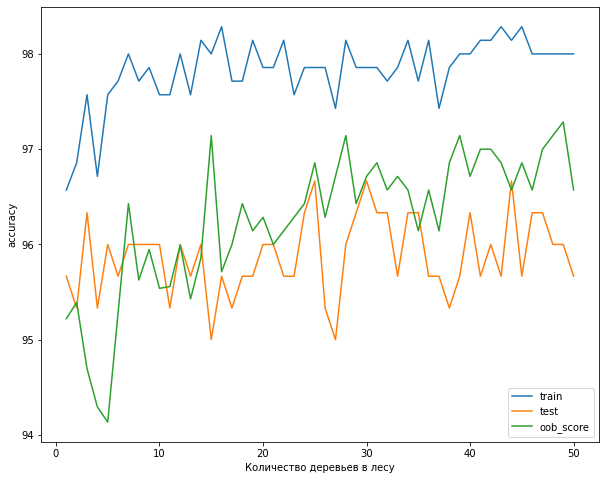

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 51), train_accs, label='train')
plt.plot(range(1, 51), test_accs, label='test')
plt.plot(range(1, 51), oob_score_list, label='oob_score')
plt.xlabel('Количество деревьев в лесу')
plt.ylabel('accuracy')
plt.legend();